## Final Project, by Ben Ho

With the growing danger of climate change, people are being more mindful of their carbon footprint, especially with their cars. While electric vehicles have grown significantly in popularity, most people are still reluctant to make the switch. Instead, people choose to be more conscientious with their car purchases, putting more importance on efficiency and emissions.

In this project, I will be exploring a dataset on the fuel consumption ratings of the most popular gas-powered cars in 2022. I will attempt to answer these two questions:

1. Can we predict a car's CO2 Emissions ratings?
2. Can we identify a car's manufacturer?


Dataset from Kaggle: https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

Columns in dataset:
- Model Year: The model year of the car, which is 2022 for all rows.
- Make: The manufacturer of the car.
- Model: The specific model of the car.
- Vehicle Class: The class of the car, dictated by size and style.
- Engine Size(L): The size of the car's engine.
- Cylinders: The count of cylinders in the engine.
- Transmission: The model of the transmission of the car.
- Fuel Type: The type of fuel the car uses.
- Fuel Consumption (City (L/100 km): The car's fuel consumption while driving in city environments.
- Fuel Consumption(Hwy (L/100 km)): The car's fuel consumption while driving on highway environments.
- Fuel Consumption(Comb (L/100 km)): The average of the car's city and highway fuel consumption, in liters per 100 kilometers.
- Fuel Consumption(Comb (mpg)): The average of the car's city and highway fuel consumption, in miles per gallon.
- CO2 Emissions(g/km): How much C02 the car emits from its tailpipe.
- CO2 Rating: A 1-10 rating based the C02 emissions from the car's tailpipe.
- Smog Rating: A 1-10 rating based on how much smog-forming pollutants the car's tailpipe emits.

In [1]:
# Imports
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('2022_cars_fuel_consumption.csv')
print(df.head())

   Model Year   Make              Model Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX       Compact             2.4   
1        2022  Acura         MDX SH-AWD    SUV: Small             3.5   
2        2022  Acura         RDX SH-AWD    SUV: Small             2.0   
3        2022  Acura  RDX SH-AWD A-SPEC    SUV: Small             2.0   
4        2022  Acura         TLX SH-AWD       Compact             2.0   

   Cylinders Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
0          4          AM8         Z                                9.9   
1          6         AS10         Z                               12.6   
2          4         AS10         Z                               11.0   
3          4         AS10         Z                               11.3   
4          4         AS10         Z                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0                               7.0       

### Data Cleaning and Exploration

I am exploring the data to see what needs to be cleaned up and what initial impressions I can find.

In [3]:
# Data Exploration

print(df.dtypes)
print(df.head())
df.drop(['Model Year'], axis=1, inplace=True)
df.drop(['CO2 Emissions(g/km)'], axis=1, inplace=True)

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object
   Model Year   Make              Model Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX       Compact             2.4   
1        2022  Acura         MDX SH-AWD    SUV: Small             3.5   
2        2022  Acura         RDX SH-AWD    SUV: Small             2.0   
3        2022  Acur

The model name of a car sometimes has a code to indicate a special characteristic of the car, such as the inclusion of all-wheel drive (AWD). The owner of this dataset listed out these codes, but did not create a column for them, so I am doing it below.

In [4]:
drive_type = []
wheel_base = []
flex_fuel_ind = []

wheel_drive_types = ['4WD', '4X4', 'AWD']
wheel_base_types = ['SWB', 'LWB', 'EWB']
flex_fuel_indicator = 'FFV'

for i in df['Model']:
    drive = '2WD'
    for j in wheel_drive_types:
        if j in i:
            drive = 'AWD'
    drive_type.append(drive)
    
    wheelbase = 'NMB'
    for k in wheel_base_types:
        if k in i:
            wheelbase = k
    wheel_base.append(wheelbase)
    
    if 'FFV' in i:
        flex_fuel_ind.append('FFV')
    else:
        flex_fuel_ind.append('NONE')

df['Wheel Drive Type'] = np.array(drive_type).tolist()
df['Wheel Base'] = np.array(wheel_base).tolist()
df['Flex Fuel Vehicle Indicator'] = np.array(flex_fuel_ind).tolist()

print(df['Wheel Drive Type'].value_counts())
print(df['Wheel Base'].value_counts())
print(df['Flex Fuel Vehicle Indicator'].value_counts())

2WD    596
AWD    350
Name: Wheel Drive Type, dtype: int64
NMB    935
LWB      8
EWB      2
SWB      1
Name: Wheel Base, dtype: int64
NONE    918
FFV      28
Name: Flex Fuel Vehicle Indicator, dtype: int64


In [5]:
print(df.head())

    Make              Model Vehicle Class  Engine Size(L)  Cylinders  \
0  Acura                ILX       Compact             2.4          4   
1  Acura         MDX SH-AWD    SUV: Small             3.5          6   
2  Acura         RDX SH-AWD    SUV: Small             2.0          4   
3  Acura  RDX SH-AWD A-SPEC    SUV: Small             2.0          4   
4  Acura         TLX SH-AWD       Compact             2.0          4   

  Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
0          AM8         Z                                9.9   
1         AS10         Z                               12.6   
2         AS10         Z                               11.0   
3         AS10         Z                               11.3   
4         AS10         Z                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0                               7.0                                8.6   
1                               9.4     

In [6]:
print(df.isnull().sum())

# Luckily, the dataset contains no null values, which is ideal. This saves a lot of cleaning and processing.

Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Rating                           0
Smog Rating                          0
Wheel Drive Type                     0
Wheel Base                           0
Flex Fuel Vehicle Indicator          0
dtype: int64


In [7]:
for i in df.columns:
    print(df[i].value_counts())

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64
Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverado 4WD                     5
Sierra 4WD Mud Terrain Tire       5
Mustang                           5
               

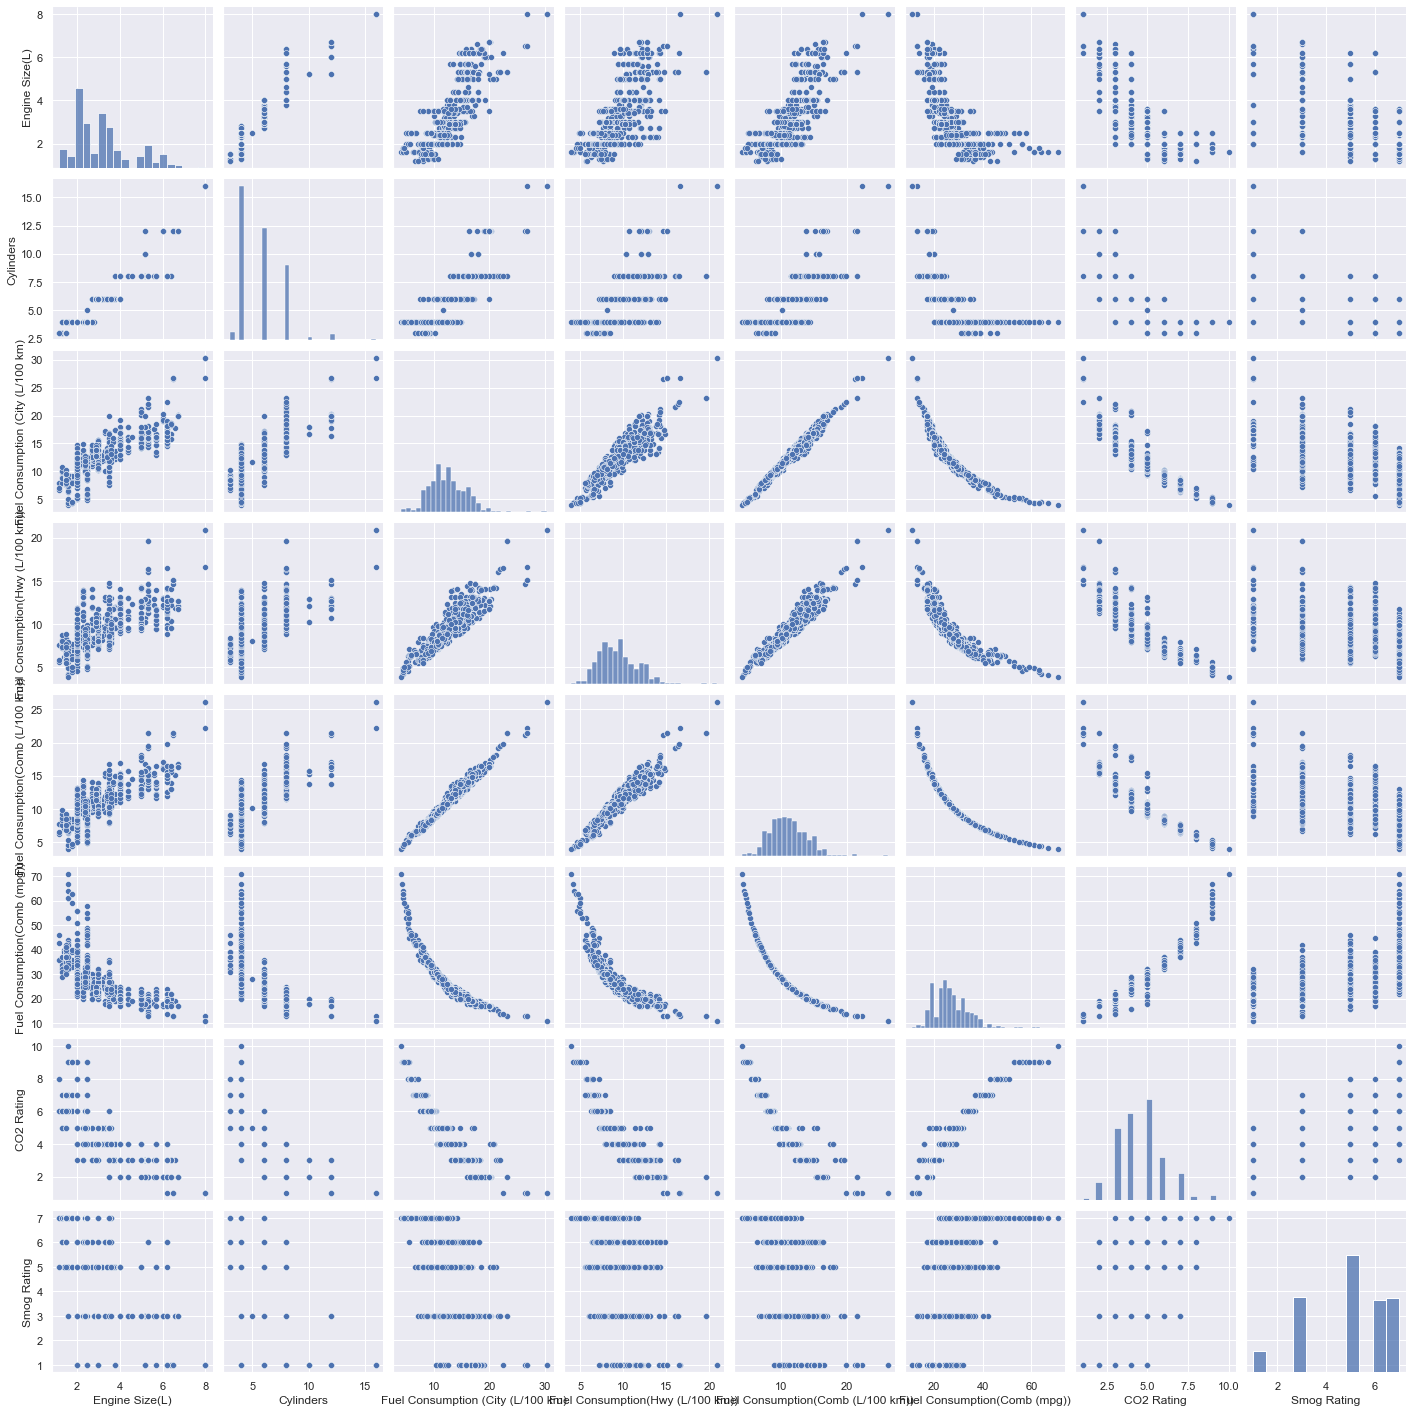

In [8]:
# Correlation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc = {'figure.figsize':(20,20)})
sns.pairplot(df)
plt.show()

Looking at the graphs, CO2 emissions correlates with a lot of the features. This makes sense because of a few facts. The more efficient the car, the less it emits. The more cylinders an engine has, the bigger the engine, and the less efficient the car.]

There's 4 columns with fuel consumption data and they are all correlated. To simplify the data, I'll drop 3 of these columns and just keep the combined fuel consumption in L/100km, since all other measurements are in metric.

I'm also dropping the Model because it's not useful to the analysis.

In [9]:
df.drop(['Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'Model'], axis=1, inplace=True)

In [10]:
print(df.dtypes)

Make                                  object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption(Comb (L/100 km))    float64
CO2 Rating                             int64
Smog Rating                            int64
Wheel Drive Type                      object
Wheel Base                            object
Flex Fuel Vehicle Indicator           object
dtype: object


In [11]:
# Converting variables

from sklearn import preprocessing
from sklearn.compose import make_column_selector as col_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

cat_cols_obj = col_selector(dtype_include=object)
cat_features = cat_cols_obj(df)

num_cols_obj = col_selector(dtype_include=['int64', 'float64'])
num_features = num_cols_obj(df)

print(cat_features)
print(num_features)

['Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Wheel Drive Type', 'Wheel Base', 'Flex Fuel Vehicle Indicator']
['Engine Size(L)', 'Cylinders', 'Fuel Consumption(Comb (L/100 km))', 'CO2 Rating', 'Smog Rating']


### Predicting CO2 Emissions Rating

Here, I am building, running, and testing some models for their accuracy at predicting CO2 rating. I start with splitting the data for training and testing. I then create a preprocessor to encode categorical data and scale numerical data. Next, I create pipelines for each model, fit the data to the models, and calculate their accuracy scores.

After lookiing at the scores, I take a look at feature importances. I also perform Principal Component Analysis (PCA) to see if I can reduce the dimensionality of the data.

In [12]:
# Linear Regression, Decision Trees, Random Forest, and Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, Pipeline

x = df.copy(deep=True)
x.drop(['CO2 Rating'], axis=1, inplace=True)
y = df['CO2 Rating']

num_feats_sans_co2 = [x for x in num_features if x != 'CO2 Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), num_feats_sans_co2),
               ('cat', OrdinalEncoder(), cat_features)])

lin_pipe = make_pipeline(preprocessor, linear_model.LinearRegression())
dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())
nb_pipe = make_pipeline(preprocessor, GaussianNB())

In [13]:
from sklearn import metrics

lin_pipe.fit(x_train, y_train)
print("Linear Regression score: %.3f" % lin_pipe.score(x_test, y_test))

dt_pipe.fit(x_train, y_train)
print("Decision Tree score: %.3f" % dt_pipe.score(x_test, y_test))

rf_pipe.fit(x_train, y_train)
print("Random Forest score: %.3f" % rf_pipe.score(x_test, y_test))

nb_pipe.fit(x_train, y_train)
print("Naive Bayes score: %.3f" % nb_pipe.score(x_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = [dt_pipe, rf_pipe, nb_pipe]

for i in models:
    print(classification_report(y_test, i.predict(x_test)))

Linear Regression score: 0.874
Decision Tree score: 0.963
Random Forest score: 0.968
Naive Bayes score: 0.579
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      0.89      0.94         9
           3       0.95      0.95      0.95        39
           4       0.96      1.00      0.98        43
           5       1.00      1.00      1.00        45
           6       1.00      0.97      0.98        29
           7       0.94      0.94      0.94        17
           8       0.67      1.00      0.80         2
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         0

    accuracy                           0.96       190
   macro avg       0.85      0.81      0.82       190
weighted avg       0.97      0.96      0.97       190

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.9

C:\Users\hoben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hoben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

CO2 Ratings is an interesting target because it's an ordinal integer scale, so I inferred that both regression and classification would work. Looking at the accuracy of the models, this proved true. Linear Regression has a respectable 87%, and Decision Trees and Random Forest have high accuracies around 96%/97%. It's interesting that Naive Bayes is so low with 58%.

These high accuracy scores aren't surprising because logically, a lot of these features are directly related to the emissions of a car, especially the numerical features. To explore the categorical features a bit more, I'll run the same models for just the categorical variables.

In [14]:
# Same models, with only categorical variables

x_cat = x[cat_features]
y = df['CO2 Rating']

x_cat_train, x_cat_test, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=4)

preprocessor = ColumnTransformer(
               transformers=[('cat', OrdinalEncoder(), cat_features)])

lin_pipe_cat = make_pipeline(preprocessor, linear_model.LinearRegression())
dt_pipe_cat = make_pipeline(preprocessor, DecisionTreeClassifier())
rf_pipe_cat = make_pipeline(preprocessor, RandomForestClassifier())
nb_pipe_cat = make_pipeline(preprocessor, GaussianNB())

x_cat_train, x_cat_test, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=4)

lin_pipe_cat.fit(x_cat_train, y_train)
print("Linear Regression score: %.3f" % lin_pipe_cat.score(x_cat_test, y_test))

dt_pipe_cat.fit(x_cat_train, y_train)
print("Decision Tree score: %.3f" % dt_pipe_cat.score(x_cat_test, y_test))

rf_pipe_cat.fit(x_cat_train, y_train)
print("Random Forest score: %.3f" % rf_pipe_cat.score(x_cat_test, y_test))

nb_pipe_cat.fit(x_cat_train, y_train)
print("Naive Bayes score: %.3f" % nb_pipe_cat.score(x_cat_test, y_test))

Linear Regression score: 0.196
Decision Tree score: 0.505
Random Forest score: 0.516
Naive Bayes score: 0.105


In [15]:
x_cat_train_featimp = preprocessor.fit_transform(x_cat_train)

rf_featimp = RandomForestClassifier()
rf_featimp.fit(x_cat_train_featimp, y_train)

feats = {}
for feature, importance in zip(x_cat.columns, rf_featimp.feature_importances_):
    feats[feature] = importance 
    
print('Feature Importances:')
for i in feats:
    print(i, ' : ', round(feats[i],3))

Feature Importances:
Make  :  0.306
Vehicle Class  :  0.246
Transmission  :  0.288
Fuel Type  :  0.09
Wheel Drive Type  :  0.054
Wheel Base  :  0.007
Flex Fuel Vehicle Indicator  :  0.008


The accuracy scores reinforce the idea that the numerical features are directly related to CO2 emissions, as without them, the accuracies drop drastically.

Since Random Forest had one of the highest accuracy score, I used it to find the feature importances of the categorical variables. Surprisingly, the type of fuel that a car uses and whether or not its a flex fuel vehicle is not very important in predicting CO2 emissions, though this could be because these two features are not very balanced.

It's interesting how important a car's manufacturer, class, and transmission is in predicting CO2 emissions ratings, though it could make sense for a few reasons. Automatic transmissions are generally more fuel efficient than manual transmissions. A car's class indicates its size, and large vehicles are less efficient. Manufacturers target different demographics, and different demographics place different importance on emissions.

However, given the scores, these categorical features aren't very good at predicting CO2 emissions ratings, and so probably have low correlation to it.

Explained variance for 4-component PCA:  [3.84547637 0.67252902 0.34440657 0.07867253]
Explained variance ratios for 4-component PCA:  [0.76828228 0.13436362 0.0688085  0.01571787]
Cumulative explained variance ratios:  [0.76828228 0.9026459  0.9714544  0.98717227]


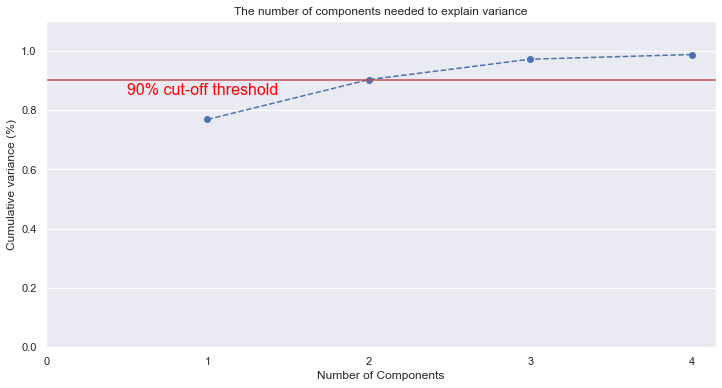

In [16]:
# PCA

from sklearn.decomposition import PCA

x = df.copy(deep=True)
x_num = x[num_features]
x_num.drop(['CO2 Rating'], axis=1)
x_num = StandardScaler().fit_transform(x_num)
y = df['CO2 Rating']

pca4 = PCA(n_components=4)
pcomps4 = pca4.fit_transform(x_num)

pca4_df = pd.DataFrame(data = pcomps4, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
finaldf4 = pd.concat([pca4_df, y], axis=1)

print('Explained variance for 4-component PCA: ', pca4.explained_variance_)
print('Explained variance ratios for 4-component PCA: ', pca4.explained_variance_ratio_)
print('Cumulative explained variance ratios: ', np.cumsum(pca4.explained_variance_ratio_))


# Plotting cumulative variance curve
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
yi = np.cumsum(pca4.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Here, I perform Principal Component Analysis to see if I could scale the dimensionality of the numerical features down from 5. Judging from the explained variance ratios, only 2 Principal Components (PCs) are needed to account for over 90% of variance, and 3 PCs would account for over 97% of variance.

Given how accurate the previous models have been, I'll test using 3 PCs with Support Vector Machines (SVM).

In [17]:
from sklearn.svm import SVC

x_pc = pca4_df[['PC1','PC2','PC3']]
x_train, x_test, y_train, y_test = train_test_split(x_pc, y, test_size=0.2, random_state=4)

svc_lin = SVC(kernel='linear')
svc_lin.fit(x_train, y_train)
svc_lin_y_pred = svc_lin.predict(x_test)

print(confusion_matrix(y_test, svc_lin_y_pred))
print(classification_report(y_test, svc_lin_y_pred))
print("SVC Linear Accuracy is: %0.2f" %(accuracy_score(y_test, svc_lin_y_pred)))

[[ 3  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0]
 [ 0  1 38  0  0  0  0  0  0]
 [ 0  0  1 42  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.90      1.00      0.95         9
           3       0.97      0.97      0.97        39
           4       1.00      0.98      0.99        43
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190

SVC Linear Accuracy is: 

SVM with 3PCs returned a 99% accuracy, which is consistent with the accuracy of the previous models. This means that instead of using the original 11 features that we had, we could use these 3 principal components and achieve the same accuracy. This can help reduce run-time, especially if we scale this data up.

### Predicting Manufacturer

Here, I am building, running, and testing models to predict a car's manufacturer. I do the same as above: splitting the data, creating a preprocessor and pipelines, and finding model accuracies and feature importances.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, Pipeline

x = df.copy(deep=True)
x.drop(['Make'], axis=1, inplace=True)
y = df['Make']

cat_feats_sans_make = [x for x in cat_features if x != 'Make']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), num_features),
               ('cat', OrdinalEncoder(), cat_feats_sans_make)])

dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier())
nb_pipe = make_pipeline(preprocessor, GaussianNB())

dt_pipe.fit(x_train, y_train)
print("Decision Tree score: %.3f" % dt_pipe.score(x_test, y_test))

rf_pipe.fit(x_train, y_train)
print("Random Forest score: %.3f" % rf_pipe.score(x_test, y_test))

nb_pipe.fit(x_train, y_train)
print("Naive Bayes score: %.3f" % nb_pipe.score(x_test, y_test))

Decision Tree score: 0.621
Random Forest score: 0.647
Naive Bayes score: 0.268


In [19]:
x_train_featimp = preprocessor.fit_transform(x_train)

rf_featimp = RandomForestClassifier()
rf_featimp.fit(x_train_featimp, y_train)

feats = {}
for feature, importance in zip(x.columns, rf_featimp.feature_importances_):
    feats[feature] = importance 
    
print('Feature Importances:')
for i in feats:
    print(i, ' : ', round(feats[i],3))

Feature Importances:
Vehicle Class  :  0.149
Engine Size(L)  :  0.041
Cylinders  :  0.217
Transmission  :  0.06
Fuel Type  :  0.104
Fuel Consumption(Comb (L/100 km))  :  0.131
CO2 Rating  :  0.198
Smog Rating  :  0.055
Wheel Drive Type  :  0.04
Wheel Base  :  0.002
Flex Fuel Vehicle Indicator  :  0.004


As expected, it is harder to predict a car's Make given this data, as it is geared towards CO2 emissions. We see that a car's number of cylinders in the engine, CO2 rating, vehicle class, and fuel consumption are the 4 most important features for this prediction. Like previously mentioned, this is probably because manufacturers make car for their target demographics. Some manufacturers focus on bigger and more powerful cars that are less fuel efficient, while others focus on fuel efficiency.

However, the low accuracy scores tell us that it is not so clear-cut as saying one manufacturer focuses solely on performance or efficiency. It shows that manufacturers make a wide variety of cars to try to target many different demographics that may have brand loyalty.

### Conclusion

To recap, I'll go back and answer my original questions:

1. Can we predict a car's CO2 Emissions ratings?
    - Yes, very much so. I was able to achieve a 97% accuracy with the Decision Trees and Random Forest models, so I would say that we can confidently predict a car's CO2 emissions rating with the given data.
2. Can we identify a car's manufacturer?
    - Unfortunately, I would have to say no, we cannot. At best, I got a 65% accuracy with the Random Forest model, which is too low for me to be confident.
    
These results are not very surprising. The dataset is geared towards CO2 emissions, so it's only natural that we can accurately predict CO2 emissions ratings. Car manufacturers create a wide variety to cars to target loyal fans of the brand in different demographics, so it's tough to identify a manufacturer based on a car's emissions data.

#### All Imports

- import numpy as np
- import pandas as pd
- import seaborn as sns
- import matplotlib.pyplot as plt
- %matplotlib inline
- from sklearn import preprocessing
- from sklearn.compose import make_column_selector as col_selector, ColumnTransformer
- from sklearn.preprocessing import StandardScaler, OrdinalEncoder
- from sklearn.model_selection import train_test_split
- from sklearn import linear_model
- from sklearn.tree import DecisionTreeClassifier
- from sklearn.ensemble import RandomForestClassifier
- from sklearn.naive_bayes import GaussianNB
- from sklearn.pipeline import make_pipeline, Pipeline
- from sklearn import metrics
- from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
- from sklearn.decomposition import PCA
- from sklearn.svm import SVC